In [39]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [40]:
lines = [
    'It was a nice rainy day.',
    'The things were so beautiful in his point.',
    'When your focus is clear, you won.',
    'Many many happy returns of the day.'
]

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)

In [43]:
tokenizer.word_docs

tokenizer.index_word

{1: 'day',
 2: 'the',
 3: 'many',
 4: 'it',
 5: 'was',
 6: 'a',
 7: 'nice',
 8: 'rainy',
 9: 'things',
 10: 'were',
 11: 'so',
 12: 'beautiful',
 13: 'in',
 14: 'his',
 15: 'point',
 16: 'when',
 17: 'your',
 18: 'focus',
 19: 'is',
 20: 'clear',
 21: 'you',
 22: 'won',
 23: 'happy',
 24: 'returns',
 25: 'of'}

In [44]:
tokenizer.index_docs # word at number 4 is present 1 time, word at 2 is present 2 times 

defaultdict(int,
            {4: 1,
             5: 1,
             7: 1,
             6: 1,
             1: 2,
             8: 1,
             11: 1,
             2: 2,
             13: 1,
             15: 1,
             9: 1,
             10: 1,
             14: 1,
             12: 1,
             19: 1,
             22: 1,
             20: 1,
             21: 1,
             16: 1,
             18: 1,
             17: 1,
             24: 1,
             23: 1,
             3: 1,
             25: 1})

In [45]:
mat = tokenizer.texts_to_matrix(lines)
mat

array([[0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [46]:
seq = tokenizer.texts_to_sequences(lines)
seq

[[4, 5, 6, 7, 8, 1],
 [2, 9, 10, 11, 12, 13, 14, 15],
 [16, 17, 18, 19, 20, 21, 22],
 [3, 3, 23, 24, 25, 2, 1]]

In [47]:
m = 0
for sent in seq:
    if len(sent) > m:
        m = len(sent)

print(m)

padded = pad_sequences(seq, maxlen=m, padding='post')
padded

8


array([[ 4,  5,  6,  7,  8,  1,  0,  0],
       [ 2,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22,  0],
       [ 3,  3, 23, 24, 25,  2,  1,  0]], dtype=int32)

### START FROM HERE

In [48]:
import string, re, nltk, os
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer

In [49]:
# load the doc in memory
def load_doc(filename):
    f = open(filename)
    text = f.read()
    f.close()
    return text

In [50]:
load_doc('../input/review_polarity/txt_sentoken/pos/cv000_29590.txt')


'films adapted from comic books have had plenty of success , whether they\'re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there\'s never really been a comic book like from hell before . \nfor starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid \'80s with a 12-part series called the watchmen . \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . \nthe book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . \nin other words , don\'t dismiss this film because of its source . \nif you can get past the whole comic book thing , you might find another stumbling block in from hell\'s directors , albert and allen hughes . \ngetting the hughes brothers to direct this seem

In [51]:
from nltk.tokenize import word_tokenize
swords = stopwords.words('english')

In [52]:
# Function to clean the doc
def clean_doc(doc):
    tokens = word_tokenize(doc)
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in swords]
    tokens = [token for token in tokens if len(token) > 1]
    return tokens


In [53]:
sample_data = load_doc('../input/review_polarity/txt_sentoken/pos/cv000_29590.txt')
clean_doc(sample_data)

['films',
 'adapted',
 'comic',
 'books',
 'plenty',
 'success',
 'whether',
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'geared',
 'toward',
 'kids',
 'casper',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 'never',
 'really',
 'comic',
 'book',
 'like',
 'hell',
 'starters',
 'created',
 'alan',
 'moore',
 'eddie',
 'campbell',
 'brought',
 'medium',
 'whole',
 'new',
 'level',
 'mid',
 'series',
 'called',
 'watchmen',
 'say',
 'moore',
 'campbell',
 'thoroughly',
 'researched',
 'subject',
 'jack',
 'ripper',
 'would',
 'like',
 'saying',
 'michael',
 'jackson',
 'starting',
 'look',
 'little',
 'odd',
 'book',
 'graphic',
 'novel',
 'pages',
 'long',
 'includes',
 'nearly',
 'consist',
 'nothing',
 'footnotes',
 'words',
 'dismiss',
 'film',
 'source',
 'get',
 'past',
 'whole',
 'comic',
 'book',
 'thing',
 'might',
 'find',
 'another',
 'stumbling',
 'block',
 'hell',
 'directors',
 'albert',
 'allen',
 'hughes',
 'getting',
 'hughes',
 'brothers',
 'direct',
 'seems',
 'al

In [54]:
f = open('../input/vocab.txt')
vocab = f.read().split()
f.close()
vocab

['sometimes',
 'tip',
 'hat',
 'film',
 'jump',
 'bandwagon',
 'enjoy',
 'ride',
 'saw',
 'truman',
 'show',
 'audience',
 'full',
 'teenagers',
 'doubt',
 'drawn',
 'ace',
 'ventura',
 'hoping',
 'see',
 'latest',
 'take',
 'fart',
 'jokes',
 'surprised',
 'may',
 'realized',
 'picture',
 'actually',
 'something',
 'say',
 'crowd',
 'id',
 'cant',
 'tell',
 'yet',
 'really',
 'good',
 'seems',
 'comparison',
 'awful',
 'mountain',
 'crap',
 'spewed',
 'forth',
 'bowls',
 'hollywood',
 'far',
 'year',
 'time',
 'alone',
 'make',
 'call',
 'end',
 'burbanks',
 'side',
 'concerned',
 'wanted',
 'win',
 'felt',
 'tribute',
 'jim',
 'carrey',
 'achieved',
 'legitimacy',
 'last',
 'best',
 'viewed',
 'cold',
 'little',
 'possible',
 'plot',
 'unless',
 'youre',
 'media',
 'blackout',
 'however',
 'probably',
 'know',
 'basics',
 'stars',
 'burbank',
 'everyman',
 'insurance',
 'agent',
 'living',
 'beautiful',
 'wife',
 'meryl',
 'laura',
 'linney',
 'south',
 'florida',
 'island',
 'town',

In [55]:
# Load the file, clean the data and return

def doc_to_line(filename):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    tokens = [token for token in tokens if token in vocab]

    return ' '.join(tokens)

doc_to_line('../input/review_polarity/txt_sentoken/pos/cv000_29590.txt')

'films adapted comic books plenty success whether superheroes batman superman spawn geared toward kids casper arthouse crowd ghost world never really comic book like hell starters created alan moore eddie campbell brought medium whole new level mid series called say moore campbell thoroughly subject jack ripper would like saying michael jackson starting look little odd book graphic novel pages long includes nearly consist nothing footnotes words dismiss film source get past whole comic book thing might find another stumbling block hell directors albert allen hughes getting hughes brothers direct seems almost ludicrous casting carrot top well anything better direct film set ghetto features really violent street crime mad geniuses behind menace ii society ghetto question course whitechapel london east end filthy place whores called unfortunates starting get little nervous mysterious psychopath carving profession surgical precision first stiff turns copper peter robbie coltrane world enou

## reading all files using os

In [56]:


# process docs and load all the files from directory
def process_train(directory, is_train):
    documents = []
    for filename in os.listdir(directory):
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
       
        path = directory + '//' + filename
        doc = load_doc(path)
        tokens = clean_doc(doc)
        documents.append(tokens)
    return documents

In [57]:
# all_pos_files = '../input/review_polarity/txt_sentoken/pos/'
# tr = process_train(all_pos_files, True)
# len(tr)

In [58]:
# te = process_train(all_pos_files, False)
# len(te)

In [59]:
all_pos_files = '../input/review_polarity/txt_sentoken/pos/'
all_neg_files = '../input/review_polarity/txt_sentoken/neg/'
def load_data(is_train):
    neg = process_train(all_neg_files, is_train=is_train)
    pos = process_train(all_pos_files, is_train=is_train)

    docs = neg + pos
    lables = [0 for i in range(len(neg))] + [1 for i in range(len(pos))]
    return docs, lables

In [60]:
# load training data
train_data, train_labels = load_data(True)
# load testing data
test_data, test_labels = load_data(False)

len(train_data), len(train_labels), len(test_data), len(test_labels)

(1810, 1810, 200, 200)

In [61]:
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer



In [62]:
tokenizer = create_tokenizer(train_data)

In [63]:
X_train = tokenizer.texts_to_matrix(train_data)

In [64]:
X_train.shape

(1810, 36389)

In [65]:
X_test = tokenizer.texts_to_matrix(test_data)
X_test.shape

(200, 36389)

In [66]:
def define_model(n_words):
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(n_words,)),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    loss_fn = tf.keras.losses.BinaryCrossentropy()
    optimizer = tf.keras.optimizers.Adam()
    metrics = ['accuracy']
    model.compile(loss=loss_fn, optimizer=optimizer, metrics=metrics)
    return model

In [67]:
model = define_model(X_train.shape[1])

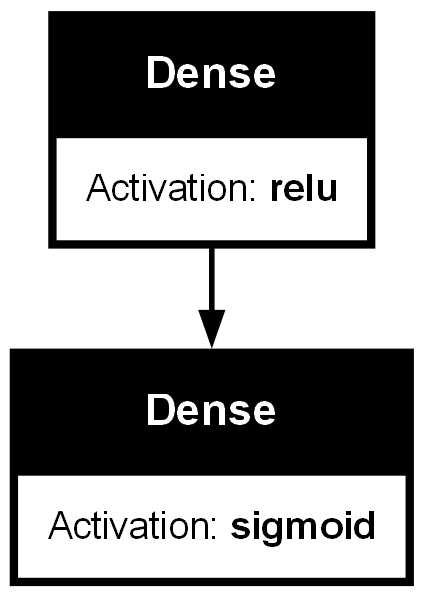

In [68]:
from keras.utils import plot_model
plot_model(model=model, show_layer_activations=True)

In [69]:
hist = model.fit(X_train, np.array(train_labels), validation_data=[X_test, np.array(test_labels)], epochs=10, batch_size=18)

Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7895 - loss: 0.4251 - val_accuracy: 0.9150 - val_loss: 0.2336
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9961 - loss: 0.0254 - val_accuracy: 0.9000 - val_loss: 0.2213
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.9000 - val_loss: 0.2174
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9100 - val_loss: 0.2211
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9100 - val_loss: 0.2247
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 6.3362e-04 - val_accuracy: 0.9150 - val_loss: 0.2287
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 3.7545e-04 - val_accuracy: 0.9150 - val_loss: 0.2328
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 1.0000 - loss: 2.4496e-0

In [70]:
model.evaluate(X_test, np.array(test_labels), batch_size=1)

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9100 - loss: 0.2414


[0.24135693907737732, 0.9100000262260437]

In [71]:
text1 = 'Best movie ever! It was great, I will definitely recommend it.'
text2 = 'This is a bad movie. Please don;t watch it.'

def predict_sentiment(review):
    review = clean_doc(review) # cleaning
    review = [token for token in review if token in vocab] # vocab cleaning
    review = tokenizer.texts_to_matrix([review])  # convert to matrix
    pred = model.predict(review)  # prediction

    
    if pred > 0.5:
        print('Positive', pred)
    else:
        print('Negative', 1-pred)



In [73]:
predict_sentiment(text2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Negative [[0.6422838]]
